In [76]:
sem = 0
def congruencial_mixto(cantidad, semi=None, a=6364136223846793005, c=1442695040888963407, m=((2 ** 64))):
    global sem
    if semi is not None:
        sem = semi
    numeros = []
    xo = sem
    if cantidad == 1:
        aXi = ( ((a * xo) + c) % m)
        sem = aXi
        return (aXi/m)
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros

In [77]:
from math import exp
def integral(lim_inferior, lim_superior):
    numeros_aleatorios = congruencial_mixto(cantidad=1000)
    result = 0
    for num in numeros_aleatorios:
        num = lim_inferior + (lim_superior - lim_inferior)* num
        result = result + (exp(-(num ** 2)))
    return (result * (lim_superior - lim_inferior)) / len(numeros_aleatorios)

In [78]:
from math import sqrt
from math import pi
raiz = sqrt(pi)
def error_function(probability):
    return (2 / raiz)*integral(0, probability)
    

In [129]:
C_k = [1.0]* 30
def calculate_ck():
    global C_k
    for i in range(2, len(C_k)):
        result = 0
        for k in range (0, i):
            result = result + ((C_k[k] * C_k[i - 1 - k])/((k + 1) * (2 * k + 1)))
        C_k[i] = result
        result = 0
calculate_ck()

In [137]:
from math import sqrt
from math import pi
def error_inverse_function(probabilidad):
    result = 0
    for i in range(0, len(C_k)):
        result = result + (C_k[i] * ((probabilidad * sqrt(pi)/2) ** (2 * i + 1)) / (2 * i + 1))
    return result

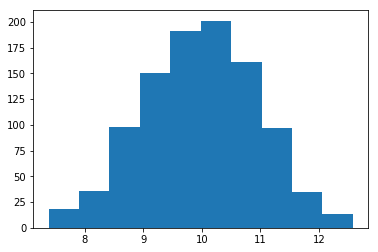

In [143]:
from math import sqrt
raiz2 = sqrt(2)
def variable_normal(miu, sigma):
    p = congruencial_mixto(cantidad=1)
    variable_normal = miu + ((sigma * raiz2) *(error_inverse_function(2 * p - 1)))
    return variable_normal
    
valores = []
for i in range(0,1000):
    valores.append(variable_normal(10, 1))
from matplotlib.pylab import hist, show
hist(valores)
show()